# Simple Linear Regression

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import warnings as w
w.filterwarnings('ignore')

In [6]:
df=pd.read_csv('height-weight.csv')

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

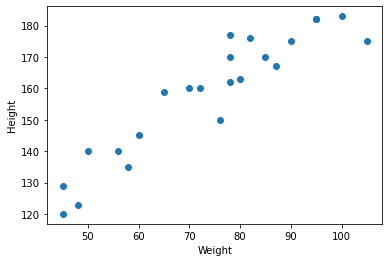

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [10]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [11]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Divide our dataset into dependent and independent feature

In [12]:
X=df[['Weight']] ##independent Feature

In [13]:
y=df['Height']  ##dependent feature

In [14]:
X.shape

(23, 1)

In [15]:
y.shape

(23,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [19]:
y_train.shape,y_test.shape

((18,), (5,))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

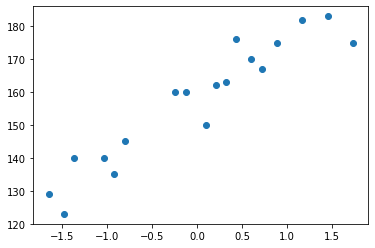

In [26]:
plt.scatter(X_train,y_train)

In [27]:
scaler.transform([[80]])

array([[0.32350772]])

Model Training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()

Training the train data

In [30]:
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
regressor.intercept_

157.5

In [32]:
regressor.coef_

array([17.03440872])

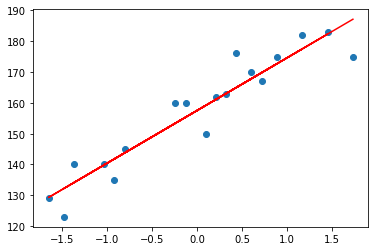

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

Prediction of train data
 1.predicted height output=intercept+coef_(weights)
 2.y_pred_train=157.5+17.03(X_train)
predicted of test data
 1.predicted height ouput=intercept+_coef(weights)
 2.y_pred_test=157.5+17.03(X_test)

Prediction for test data

In [34]:
y_pred_test=regressor.predict(X_test)

In [35]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

Perfomance Matrics MAE,MSE,RMSE

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,y_pred_test)

In [39]:
mse

109.77592599051654

In [40]:
mae=mean_absolute_error(y_test,y_pred_test)

In [41]:
mae

9.822657814519227

In [42]:
rmse=np.sqrt(mse)

In [43]:
rmse

10.477400726827076

Accuracy of the model Rsquared and Adjusted Rsquared 

In [44]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score(y_test,y_pred_test)

In [46]:
score

0.7769869860423441

In [47]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254